<a href="https://colab.research.google.com/github/njafarov/Optimization_MILP/blob/main/Callenge2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyomo
!pip install cplex -q

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.7 MB 19.2 MB/s 
     |████████████████████████████████| 49 kB 5.4 MB/s 
     |████████████████████████████████| 43.3 MB 1.4 MB/s 


In [ ]:
import pyomo.environ as pyo
from pyomo.opt import SolverFactory

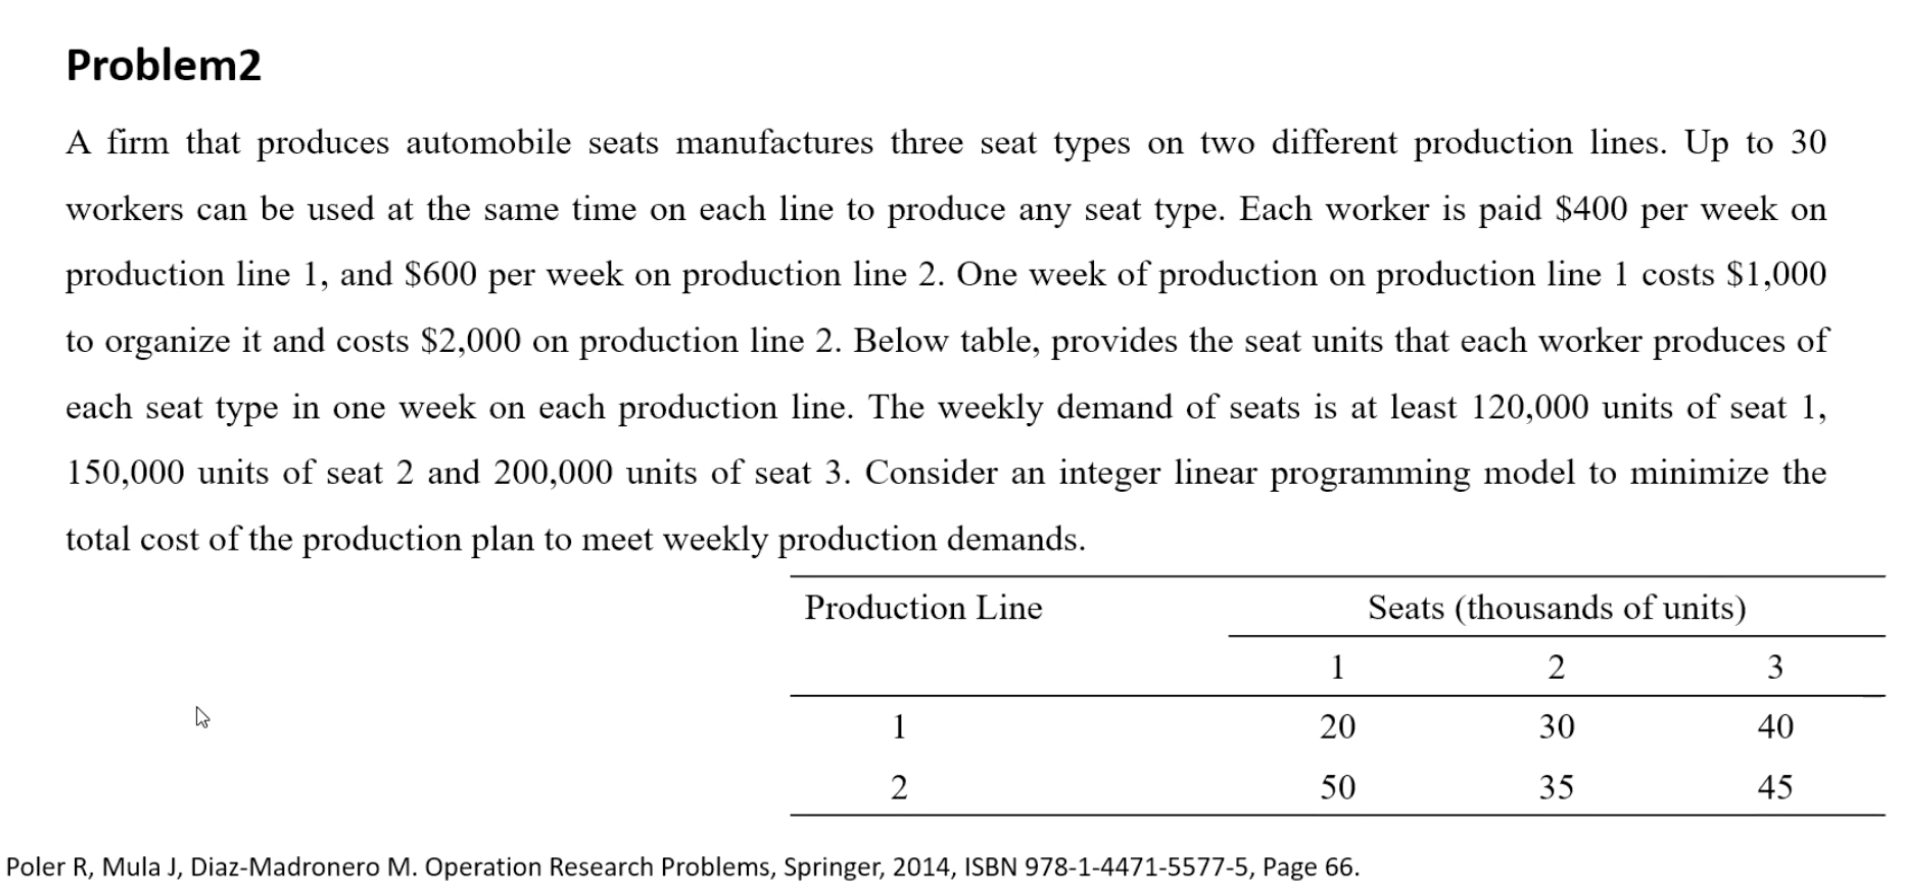

In [ ]:
# Model
model = pyo.ConcreteModel()

# Define Sets
model.i = pyo.RangeSet(1,2)
model.j = pyo.RangeSet(1,3)

# Parameters
model.S = pyo.Param(model.i, initialize={1:400,2:600})
S=model.S # Salary

model.C = pyo.Param(model.i, initialize={1:1000, 2:2000})
C = model.C # Costs

model.Seats = pyo.Param(model.i, model.j, initialize={(1,1):20,(1,2):30,(1,3):40,
                                                      (2,1):50,(2,2):35, (2,3):45})
Seats = model.Seats # Seats


# Decision Variables
model.x = pyo.Var(model.i, domain=pyo.NonNegativeIntegers)
x = model.x # workers

model.y = pyo.Var(model.i, domain=pyo.Binary)
y = model.y # Weather line is run or not

# Objective Function
def objective_function(model):
  return sum(x[i]*S[i] for i in model.i)+sum(C[i]*y[i] for i in model.i)
model.Obj = pyo.Objective(rule = objective_function, sense = pyo.minimize)

# Constrains
def cons2(model,j):
  return sum(x[i]*Seats[i,1] for i in model.i)>=120
model.Cons2 = pyo.Constraint(model.i, rule=cons2)

def cons3(model,j):
  return sum(x[i]*Seats[i,2] for i in model.i)>=150
model.Cons3 = pyo.Constraint(model.i, rule=cons3)

def cons4(model,j):
  return sum(x[i]*Seats[i,3] for i in model.i)>=200
model.Cons4 = pyo.Constraint(model.i, rule=cons4)

def cons5(model,i):
  return x[i]<=30*y[i]
model.Cons5 = pyo.Constraint(model.i, rule=cons5)


# Optimization
Solver = SolverFactory('cplex_direct')
results = Solver.solve(model)

print(results)
print("Objective function: ", model.Obj())
for i in model.i:
  print("Number of workers per line ", i, "=", x[i]())


Problem: 
- Name: 
  Lower bound: 3400.0
  Upper bound: 3400.0
  Number of objectives: 1
  Number of constraints: 8
  Number of variables: 4
  Number of binary variables: 2
  Number of integer variables: 2
  Number of continuous variables: 0
  Number of nonzeros: None
  Sense: 1
Solver: 
- Name: CPLEX 22.1.0.0
  Status: ok
  Wallclock time: 0.003916025161743164
  Termination condition: optimal
Solution: 
- number of solutions: 0
  number of solutions displayed: 0

Objective function:  3400.0
Number of workers per line  1 = 6.0
Number of workers per line  2 = 0.0
